In [153]:
import requests
import requests_cache
import json
import urllib2
import pandas as pd
from datetime import timedelta, date
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

requests_cache.install_cache("cache")

In [79]:
#json return value sample
temp = requests.get("http://api.wunderground.com/api/7c7b33990456667c/history_20120504/q/CA/Fresno.json")
temp.json()['history']['dailysummary'][0]

{u'coolingdegreedays': u'1',
 u'coolingdegreedaysnormal': u'4',
 u'date': {u'hour': u'12',
  u'mday': u'04',
  u'min': u'00',
  u'mon': u'05',
  u'pretty': u'12:00 PM PDT on May 04, 2012',
  u'tzname': u'America/Los_Angeles',
  u'year': u'2012'},
 u'fog': u'0',
 u'gdegreedays': u'16',
 u'hail': u'0',
 u'heatingdegreedays': u'0',
 u'heatingdegreedaysnormal': u'2',
 u'humidity': u'',
 u'maxdewpti': u'52',
 u'maxdewptm': u'11',
 u'maxhumidity': u'93',
 u'maxpressurei': u'30.13',
 u'maxpressurem': u'1020',
 u'maxtempi': u'77',
 u'maxtempm': u'25',
 u'maxvisi': u'10',
 u'maxvism': u'16',
 u'maxwspdi': u'17',
 u'maxwspdm': u'27',
 u'meandewpti': u'47',
 u'meandewptm': u'8',
 u'meanpressurei': u'30.09',
 u'meanpressurem': u'1019',
 u'meantempi': u'66',
 u'meantempm': u'19',
 u'meanvisi': u'10',
 u'meanvism': u'16',
 u'meanwdird': u'314',
 u'meanwdire': u'',
 u'meanwindspdi': u'10',
 u'meanwindspdm': u'16',
 u'mindewpti': u'37',
 u'mindewptm': u'3',
 u'minhumidity': u'33',
 u'minpressurei': u'

In [2]:
cities = ["San_Francisco", "Fresno", "Sacramento", "San_Jose", "San_Diego"]
#, "Bakersfield", "Modesto", "Los_Angeles", "San_Luis_Obispo"]
stations = [60410001, 60195001, 60170010, 60690003, 60731006]

In [3]:
def weather(date, city, attribute):
    temp = requests.get("http://api.wunderground.com/api/7c7b33990456667c/history_" + date + "/q/CA/" + city + ".json")
    return temp.json()['history']['dailysummary'][0][attribute]       

In [25]:
df = pd.DataFrame()

for i in range(12,17):
    for j in range(0,5):
        city = cities[j]
        csv = 'data/ozone/' + city + '/ad_viz_plotval_data' + str(i) + '.csv'
        tempdf = pd.DataFrame.from_csv(csv)
        tempdf = tempdf.loc[tempdf['AQS_SITE_ID'] == stations[j]]
        
        precips = []
        for date in tempdf.index: 
            precips.append(weather(date.strftime("%Y%m%d"), city, 'precipm'))
        
        windspeed = []
        for date in tempdf.index: 
            windspeed.append(weather(date.strftime("%Y%m%d"), city, 'meanwindspdm'))
            
        tempdf['precip'] = precips
        tempdf['windspd'] = windspeed
        tempdf['city'] = city
        tempdf['year'] = 2000+i
        df = pd.concat([df, tempdf])

In [65]:
df.loc[df['precip'] == 'T'] = 0.00
df.loc[df['windspd'] == ''] = 0.00

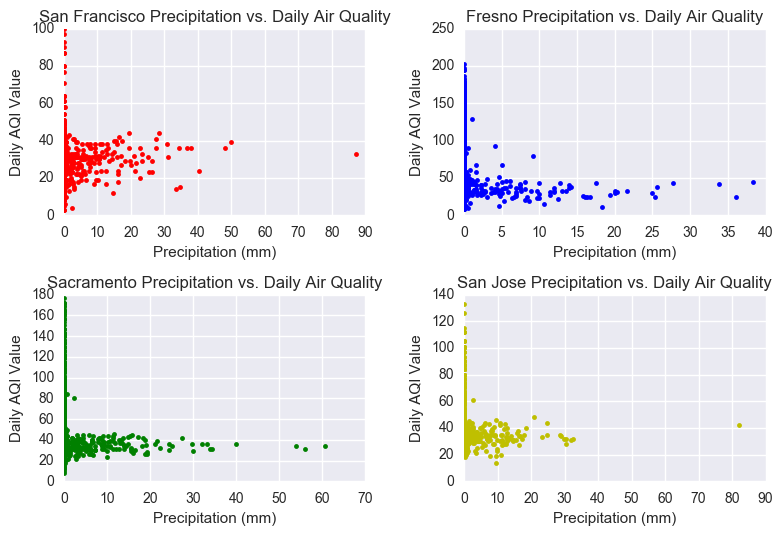

In [29]:
plt.figure()

plt.subplot(221)
plt.plot(df.loc[df['city'] == 'San_Francisco']['precip'], df.loc[df['city'] == 'San_Francisco']['DAILY_AQI_VALUE'], 'r.')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Daily AQI Value')
plt.title('San Francisco Precipitation vs. Daily Air Quality')

plt.subplot(222)
plt.plot(df.loc[df['city'] == 'Fresno']['precip'], df.loc[df['city'] == 'Fresno']['DAILY_AQI_VALUE'], 'b.')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Daily AQI Value')
plt.title('Fresno Precipitation vs. Daily Air Quality')
plt.tight_layout() 

plt.subplot(223)
plt.plot(df.loc[df['city'] == 'Sacramento']['precip'], df.loc[df['city'] == 'Sacramento']['DAILY_AQI_VALUE'], 'g.')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Daily AQI Value')
plt.title('Sacramento Precipitation vs. Daily Air Quality')

plt.subplot(224)
plt.plot(df.loc[df['city'] == 'San_Jose']['precip'], df.loc[df['city'] == 'San_Jose']['DAILY_AQI_VALUE'], 'y.')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Daily AQI Value')
plt.title('San Jose Precipitation vs. Daily Air Quality')


plt.tight_layout() 
plt.show()

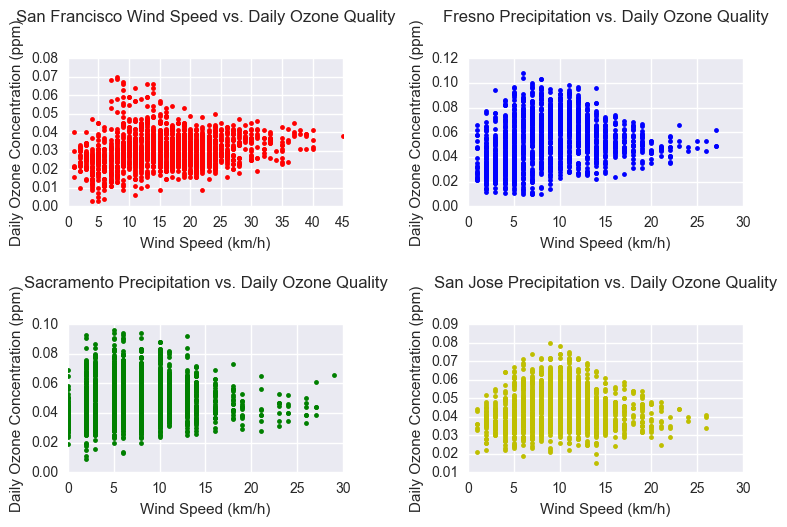

In [67]:
plt.figure()

plt.subplot(221)
plt.plot(df.loc[df['city'] == 'San_Francisco']['windspd'], df.loc[df['city'] == 'San_Francisco']['Daily Max 8-hour Ozone Concentration'], 'r.')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Daily Ozone Concentration (ppm)')
plt.title('San Francisco Wind Speed vs. Daily Ozone Quality')
ttl = plt.gca().title
ttl.set_position([.5, 1.2])

plt.subplot(222)
plt.plot(df.loc[df['city'] == 'Fresno']['windspd'], df.loc[df['city'] == 'Fresno']['Daily Max 8-hour Ozone Concentration'], 'b.')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Daily Ozone Concentration (ppm)')
plt.title('Fresno Precipitation vs. Daily Ozone Quality')
ttl = plt.gca().title
ttl.set_position([.5, 1.2])

plt.subplot(223)
plt.plot(df.loc[df['city'] == 'Sacramento']['windspd'], df.loc[df['city'] == 'Sacramento']['Daily Max 8-hour Ozone Concentration'], 'g.')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Daily Ozone Concentration (ppm)')
plt.title('Sacramento Precipitation vs. Daily Ozone Quality')
ttl = plt.gca().title
ttl.set_position([.5, 1.2])

plt.subplot(224)
plt.plot(df.loc[df['city'] == 'San_Jose']['windspd'], df.loc[df['city'] == 'San_Jose']['Daily Max 8-hour Ozone Concentration'], 'y.')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Daily Ozone Concentration (ppm)')
plt.title('San Jose Precipitation vs. Daily Ozone Quality')
ttl = plt.gca().title
ttl.set_position([.5, 1.2])

plt.tight_layout()
plt.show()

In [ ]:
sf = df.loc[df['city'] == 'San_Francisco']

temp = sf.group().
sns.factorplot("price_per_lb","food", data = temp, kind = "bar")
plt.show()

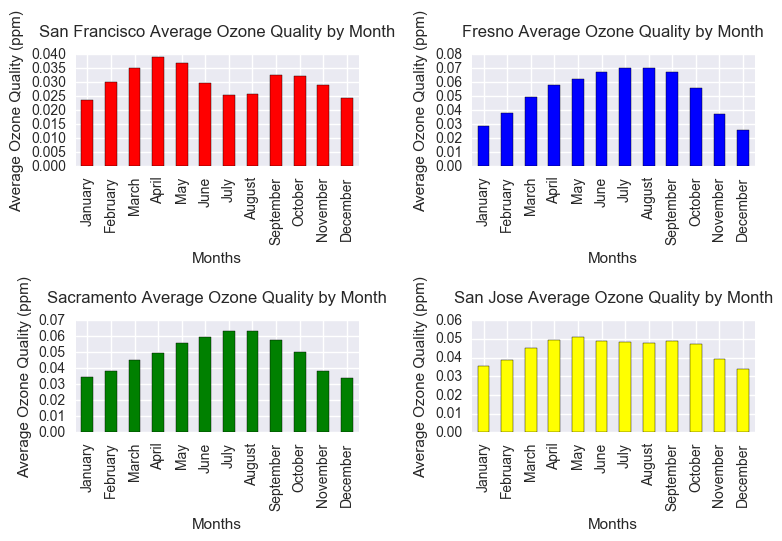

In [163]:
temp = df.groupby(['city', df.index.month])['Daily Max 8-hour Ozone Concentration'].mean()

plt.subplot(221)
temp[['San_Francisco']].plot(kind='bar', color='red')
plt.xlabel('Months')
plt.ylabel('Average Ozone Quality (ppm)')
plt.xticks(np.arange(12), calendar.month_name[1:13])
plt.title('San Francisco Average Ozone Quality by Month')
ttl = plt.gca().title
ttl.set_position([.5, 1.1])

plt.subplot(222)
temp[['Fresno']].plot(kind='bar', color='blue')
plt.xlabel('Months')
plt.ylabel('Average Ozone Quality (ppm)')
plt.xticks(np.arange(12), calendar.month_name[1:13])
plt.title('Fresno Average Ozone Quality by Month')
ttl = plt.gca().title
ttl.set_position([.5, 1.1])

plt.subplot(223)
temp[['Sacramento']].plot(kind='bar', color='green')
plt.xlabel('Months')
plt.ylabel('Average Ozone Quality (ppm)')
plt.xticks(np.arange(12), calendar.month_name[1:13])
plt.title('Sacramento Average Ozone Quality by Month')
ttl = plt.gca().title
ttl.set_position([.5, 1.1])

plt.subplot(224)
temp[['San_Jose']].plot(kind='bar', color='yellow')
plt.xlabel('Months')
plt.ylabel('Average Ozone Quality (ppm)')
plt.xticks(np.arange(12), calendar.month_name[1:13])
plt.title('San Jose Average Ozone Quality by Month')
ttl = plt.gca().title
ttl.set_position([.5, 1.1])

plt.tight_layout()
plt.show()